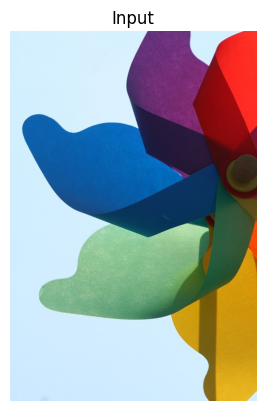

In [29]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
image_path = 'your_path/color.jpg' 
image = Image.open(image_path)
plt.imshow(image)
plt.title('Input')
plt.axis('off')  
plt.show()


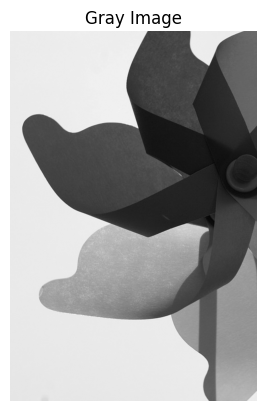

In [2]:
# Convert the image to grayscale
gray_image = image.convert('L')
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')  
plt.show()

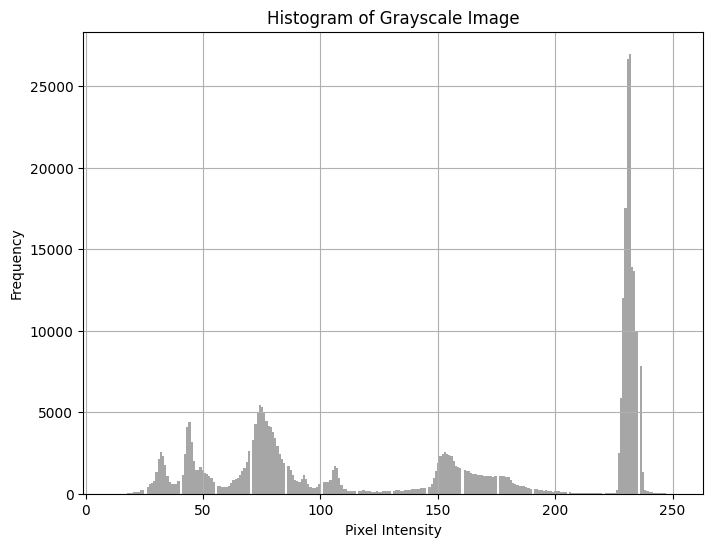

In [3]:
# Convert the grayscale image to a numpy array
image_array = np.array(gray_image)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(image_array.flatten(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

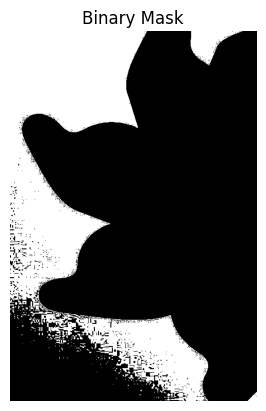

In [4]:
# Apply thresholding: Create a binary mask where intensity > 230 is 1, and others are 0
threshold_value = 230
binary_mask = image_array > threshold_value  # This will create a boolean array

# Convert the boolean mask to an integer mask (0 and 255)
binary_mask = (binary_mask * 255).astype(np.uint8)

# Save the binary mask image
binary_mask_image = Image.fromarray(binary_mask)

plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')  
plt.show()



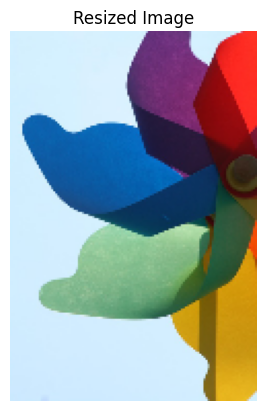

In [5]:
import cv2

image = cv2.imread('your_path/color.jpg')
resized_image = cv2.resize(image, (120, 180))

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(resized_image_rgb)
plt.title("Resized Image")
plt.axis('off')
plt.show()


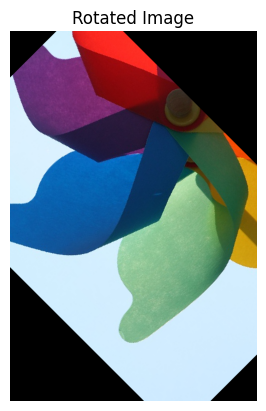

In [6]:
image = Image.open('your_path/color.jpg') 
rotated_image = image.rotate(45) 

plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')
plt.show() 

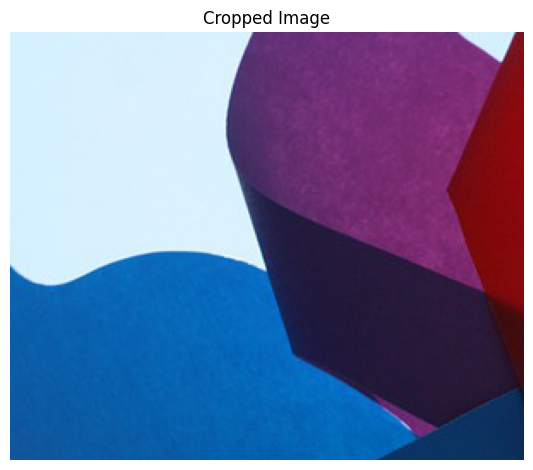

In [7]:
image_path = 'your_path/color.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define crop coordinates: (start_y, end_y), (start_x, end_x)
start_y, end_y = 50, 300  # Crop rows (height)
start_x, end_x = 100, 400  # Crop columns (width)

# Crop the image
cropped_image = image_rgb[start_y:end_y, start_x:end_x]

plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.axis("off")
plt.tight_layout()
plt.show()

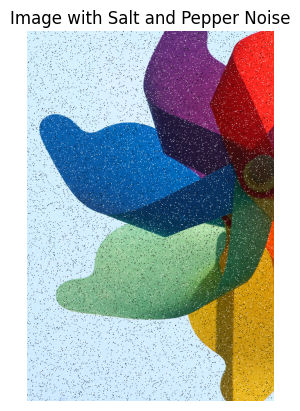

In [8]:
image = cv2.imread('your_path/color.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def add_salt_and_pepper_noise(image, amount=0.02):
    row, col, ch = image.shape
    noisy_image = np.copy(image)
    num_salt = int(amount * image.size * 0.5)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 255

    num_pepper = int(amount * image.size * 0.5)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

noisy_image = add_salt_and_pepper_noise(image_rgb)

plt.imshow(noisy_image)
plt.title("Image with Salt and Pepper Noise")
plt.axis('off') 
plt.show()


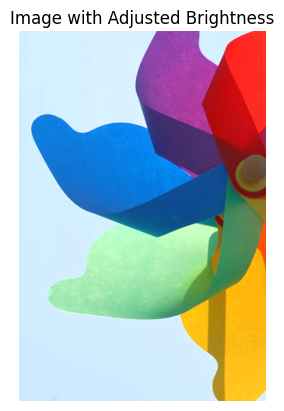

In [9]:
image = cv2.imread('your_path/color.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_hsv)

def change_brightness_in_hsv(v, brightness_factor=10):
    # Add the brightness factor to the Value channel 
    v = v.astype(np.int32)  # Convert to int32 to prevent overflow during addition
    v = v + brightness_factor
    v = np.clip(v, 0, 255)
    
    return v.astype(np.uint8)  # Convert back to uint8 after modification

v_adjusted = change_brightness_in_hsv(v, brightness_factor=50)

image_hsv_adjusted = cv2.merge([h, s, v_adjusted])
image_bgr_adjusted = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2BGR)
image_rgb_adjusted = cv2.cvtColor(image_bgr_adjusted, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb_adjusted)
plt.title("Image with Adjusted Brightness")
plt.axis('off') 
plt.show()

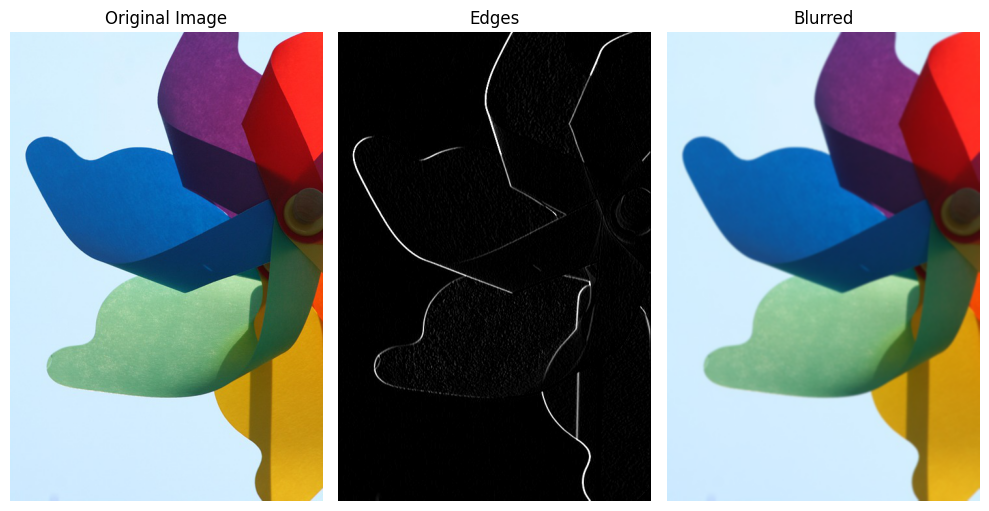

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'your_path/color.jpg' 
image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Example: Edge detection kernel (Sobel filter)
kernel_edge = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])

convolved_image_edge = cv2.filter2D(image_gray, -1, kernel_edge)
convolved_image_edge = np.clip(convolved_image_edge, 0, 255).astype(np.uint8)

convolved_image_blurred = cv2.GaussianBlur(image_rgb, (7, 7), 0) 
convolved_image_blurred = np.clip(convolved_image_blurred, 0, 255).astype(np.uint8)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(convolved_image_edge, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Blurred")
plt.imshow(convolved_image_blurred, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
# Color Constancy
"""
Global AI Image Processing Bootcamp
Dec 2024
Diclehan and Oguzhan Ulucan
"""

import numpy as np
import cv2


### Fundamental functions
def linearize_image(image):
    """
    Converts an sRGB image to linear RGB assuming the input image is in the range [0, 1]
    """
    return np.where(image <= 0.04045,
                    image / 12.92,
                    ((image + 0.055) / 1.055) ** 2.4)


def linear_to_srgb(image):
    """
    Converts a linear RGB image to sRGB assuming the input image is in the range [0, 1]
    """
    return np.where(image <= 0.0031308,
                    image * 12.92,
                    1.055 * (image ** (1 / 2.4)) - 0.055)


def handle_saturation(image, lower=0.05, upper=0.95):
    """
    Creates a mask for non-saturated pixels (those between `lower` and `upper` thresholds)
    """
    return np.all((image > lower) & (image < upper), axis=-1)



### Color constancy
def estimate_light_source_grey_world(image, mask):
    """
    Estimates the light source based on the Grey World assumption, using valid pixels from the mask
    """
    valid_pixels = image[mask]
    avg_color = np.mean(valid_pixels, axis=0)
    return avg_color / np.linalg.norm(avg_color)


def correct_colors(image, light_source):
    """
    Corrects the colors of the image by applying white balance using the estimated light source
    """
    return image * (1.0 / light_source)


def manipulate_light_source(image, light_color):
    """
    Simulates color manipulation under a different light source

    Args:
    - image: The input image (sRGB, [0, 1])
    - light_color: The light source color (unit norm RGB vector)

    Returns:
    - Manipulated image (sRGB, [0, 1])
    """
    # Step 1: Linearize the image
    linear_image = linearize_image(image)

    # Step 2: Apply the light source (multiplying the linear image by the light color)
    manipulated_image = linear_image * light_color

    # Step 3: Convert the manipulated image back to sRGB
    manipulated_srgb = linear_to_srgb(manipulated_image)

    return np.clip(manipulated_srgb, 0, 1) 


def process_and_white_balance(image):
    """
    Applies white balance using both the Grey World and Max RGB methods
    Returns both corrected images in sRGB format
    """
    linear_image = linearize_image(image)
    valid_mask = handle_saturation(linear_image)

    # Light source estimations
    grey_world_light = estimate_light_source_grey_world(linear_image, valid_mask)

    # Color correction using both light sources
    corrected_grey_world = correct_colors(linear_image, grey_world_light)

    # Convert back to sRGB
    srgb_grey_world = linear_to_srgb(corrected_grey_world)

    # Clip and return
    return np.clip(srgb_grey_world, 0, 1)


# Light sources for color manipulation
def get_light_sources():
    """
    Returns a set of light sources for image manipulation
    """
    purplish_light = np.array([0.82, 0.15, 0.89]) / np.linalg.norm([0.82, 0.15, 0.89])
    yellowish_light = np.array([0.96, 0.24, 0.11]) / np.linalg.norm([0.96, 0.24, 0.11])
    greenish_light = np.array([0.11, 0.98, 0.12]) / np.linalg.norm([0.11, 0.98, 0.12])
    return purplish_light, yellowish_light, greenish_light


def get_wb_images(image):
    """
    Process and white balance the image
    """
    
    srgb_grey_world = process_and_white_balance(image)

    # Save the white-balanced images
    #cv2.imwrite('white_balanced_grey_world.jpg', cv2.cvtColor((srgb_grey_world*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    return srgb_grey_world


def get_manipulated_images(image):
    """
    Get manipulated images by applying color vectors
    """
    
    # Get the color vectors
    purplish_light, orangish_light, greenish_light = get_light_sources()

    # Manipulate the images under different light sources
    manipulated_purplish = manipulate_light_source(image, purplish_light)
    manipulated_orangish = manipulate_light_source(image, orangish_light)
    manipulated_greenish = manipulate_light_source(image, greenish_light)

    # Save the manipulated images
    #cv2.imwrite('manipulated_purplish.jpg', cv2.cvtColor((manipulated_purplish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    #cv2.imwrite('manipulated_orangish.jpg', cv2.cvtColor((manipulated_orangish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    #cv2.imwrite('manipulated_greenish.jpg', cv2.cvtColor((manipulated_greenish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    return manipulated_purplish, manipulated_orangish, manipulated_greenish


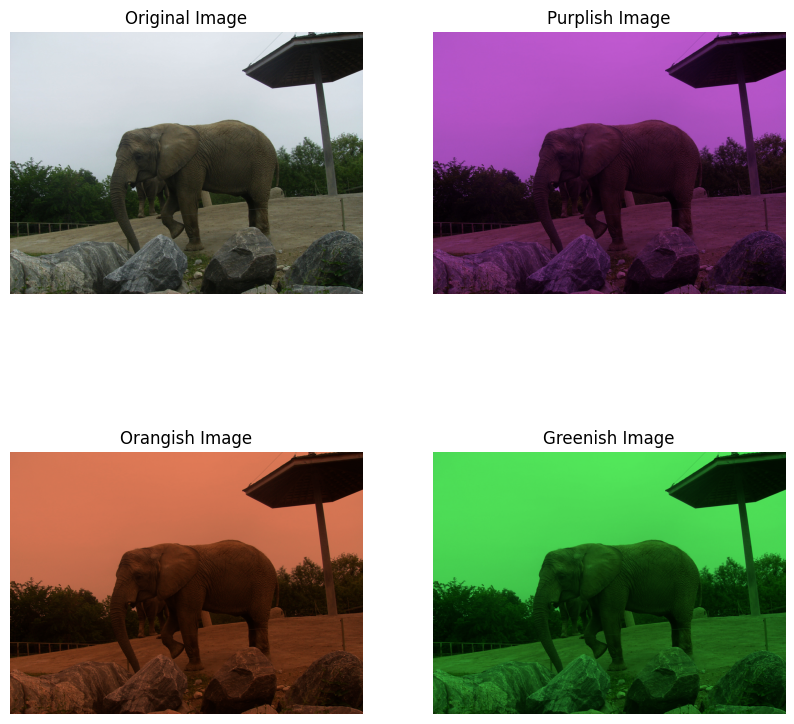

In [33]:
# Input image is from Animals with Attributes 2 (AwA2)

# Apply light sources to the input images
input_img = cv2.cvtColor(cv2.imread("your_path/color.jpg"), cv2.COLOR_BGR2RGB) / 255.0
manipulated_purplish, manipulated_orangish, manipulated_greenish = get_manipulated_images(input_img)



plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(input_img)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Purplish Image")
plt.imshow(manipulated_purplish)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title("Orangish Image")
plt.imshow(manipulated_orangish)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title("Greenish Image")
plt.imshow(manipulated_greenish)
plt.axis('off')
plt.show()


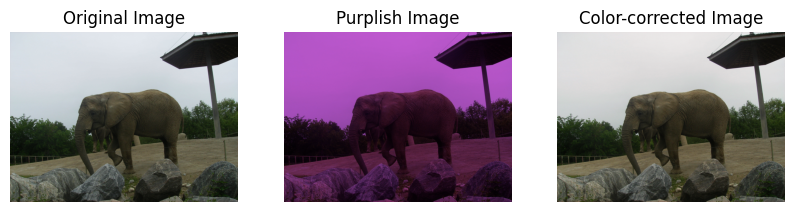

In [34]:
# Apply color constancy to manipulated image
wb_image = get_wb_images(manipulated_purplish)


plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(input_img)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Purplish Image")
plt.imshow(manipulated_purplish)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Color-corrected Image")
plt.imshow(wb_image)
plt.axis('off')
plt.show()